#### Web scraping project - books reviews
#### Data source: https://www.goodreads.com/list/show/1.Best_Books_Ever

In [109]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
link = 'https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Literature'
response = requests.get(link)
soup = BeautifulSoup(response.text, 'html.parser')

In [111]:
table = soup.find('table', {'class': 'wikitable'})

In [140]:
rows = table.find_all('tr')
nobel_laureates = []
for row in rows[1:]:
    cells = row.find_all('td')
    if len(cells) >= 4:
        name = cells[2].text.strip()
        country_cell = cells[3]
        country = country_cell.text.strip()
        if country_cell.find('a'):
            country = country_cell.find('a').text.strip()
        if len(name)>10:
            nobel_laureates.append({
                'Name': name,
                'Country': country,
            })

In [147]:
df = pd.DataFrame(nobel_laureates)
df

Name        Country
0          Sully Prudhomme  (1839–1907)         France
1          Theodor Mommsen  (1817–1903)        Germany
2    Bjørnstjerne Bjørnson  (1832–1910)         Norway
3         Frédéric Mistral  (1830–1914)         France
4       Henryk Sienkiewicz  (1846–1916)         Poland
..                                  ...            ...
112             Peter Handke  (b. 1942)        Austria
113           Louise Glück  (1943–2023)  United States
114        Abdulrazak Gurnah  (b. 1948)       Tanzania
115             Annie Ernaux  (b. 1940)         France
116                Jon Fosse  (b. 1959)         Norway

[117 rows x 2 columns]

In [142]:
country_counts = df['Country'].value_counts()

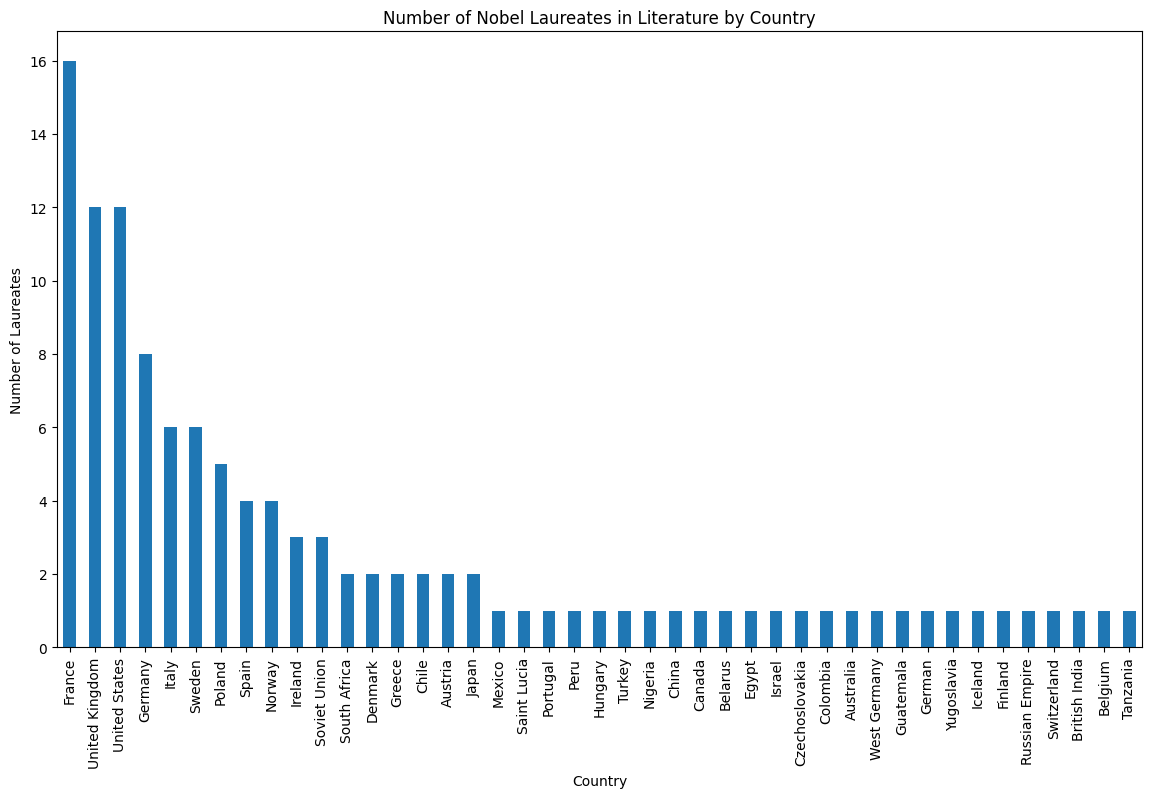

In [143]:
plt.figure(figsize=(14, 8))
country_counts.plot(kind='bar')
plt.title('Number of Nobel Laureates in Literature by Country')
plt.xlabel('Country')
plt.ylabel('Number of Laureates')
plt.xticks(rotation=90)
plt.show()

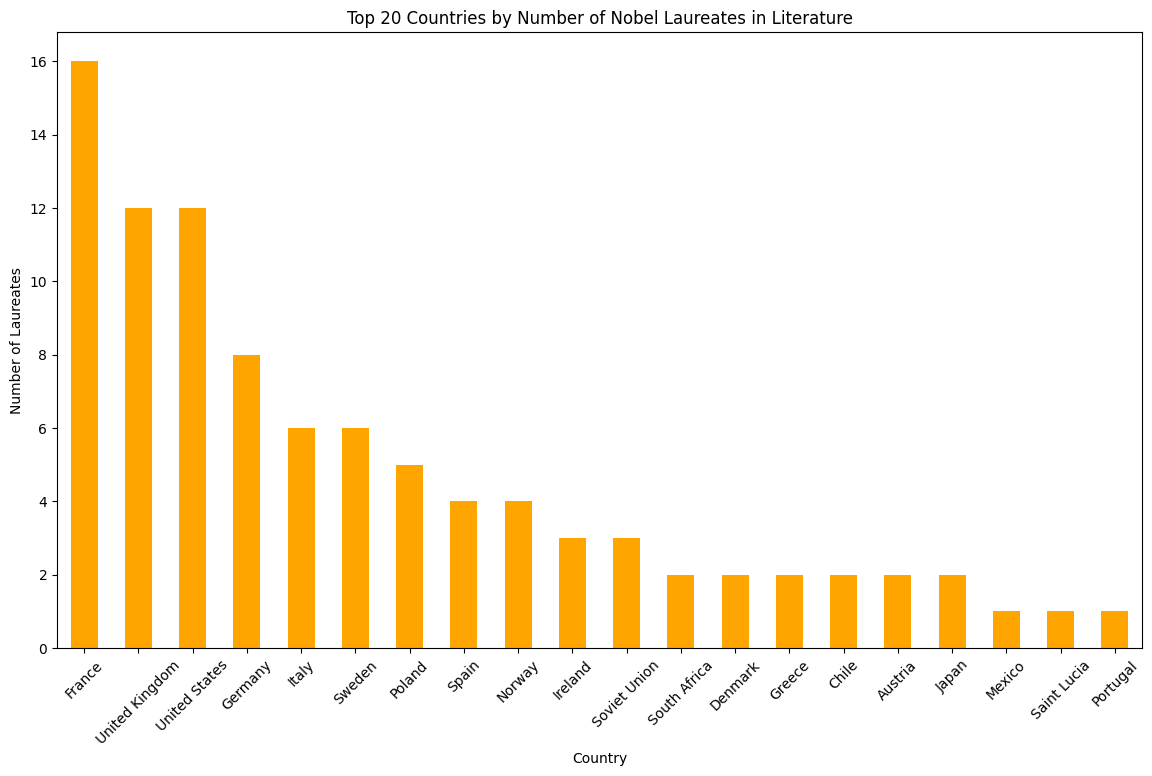

In [144]:
top_20_countries = country_counts.head(20)
plt.figure(figsize=(14, 8))
top_20_countries.plot(kind='bar', color='orange')
plt.title('Top 20 Countries by Number of Nobel Laureates in Literature')
plt.xlabel('Country')
plt.ylabel('Number of Laureates')
plt.xticks(rotation=45)
plt.show()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     117 non-null    object
 1   Country  117 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [146]:
print(country_counts)

Country
France            16
United Kingdom    12
United States     12
Germany            8
Italy              6
Sweden             6
Poland             5
Spain              4
Norway             4
Ireland            3
Soviet Union       3
South Africa       2
Denmark            2
Greece             2
Chile              2
Austria            2
Japan              2
Mexico             1
Saint Lucia        1
Portugal           1
Peru               1
Hungary            1
Turkey             1
Nigeria            1
China              1
Canada             1
Belarus            1
Egypt              1
Israel             1
Czechoslovakia     1
Colombia           1
Australia          1
West Germany       1
Guatemala          1
German             1
Yugoslavia         1
Iceland            1
Finland            1
Russian Empire     1
Switzerland        1
British India      1
Belgium            1
Tanzania           1
Name: count, dtype: int64
